# <span style ='color:#0A1172'>DHHS Chronic Disease Indicators: Cancer Prevalance Analysis
## <span style ='color:#59788E'> <bu>EXPLORATORY NOTEBOOK</bu>

- <span style ='color:#016064'>by Annie Carter
- <span style ='color:#016064'>Sourced by U.S. Department of Health & Human Services

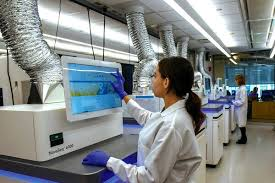

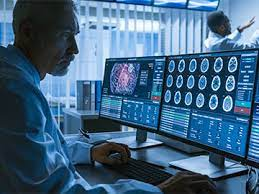

 Custom Palette = Navy #0A1172, Stone #59788E, Ocean #757C88, Berry #241571

In [55]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os
import datetime


## <span style ='color:#241571'>ACQUIRE

In [2]:
# Save and read dataset csv from https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi
df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')

/var/folders/0f/gkm6knzn3fscjt7dxlgc9k5h0000gn/T/ipykernel_34745/2347781156.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')


In [3]:
# Review shape to determine processing needs, will use sample size due to network restrictions for exploration
df.shape

(1185676, 34)

In [4]:
#Review data to look at columns datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [5]:
# Quick review of data in columns started with 40 then transpose for readiability with head of 5
df.head().T

,0,1,2,3,4
YearStart,2014,2018,2018,2017,2010
YearEnd,2014,2018,2018,2017,2010
LocationAbbr,AR,CO,DC,GA,MI
LocationDesc,Arkansas,Colorado,District of Columbia,Georgia,Michigan
DataSource,SEDD; SID,SEDD; SID,SEDD; SID,SEDD; SID,SEDD; SID
Topic,Asthma,Asthma,Asthma,Asthma,Asthma
Question,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma
Response,NaN,NaN,NaN,NaN,NaN
DataValueUnit,NaN,NaN,NaN,NaN,NaN
DataValueType,Number,Number,Number,Number,Number


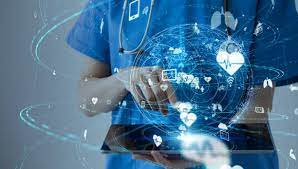

## <span style ='color:#241571'>PREPARE
Reduced sample dataframe to 100K to rapidly review and clean. 

In [6]:
#created sample DF with random state of 42 to review and clean data rapidly
df_sample= df.sample(n=100000, random_state=42)


In [7]:
# List of columns to remove. 
columns_to_remove = ['YearEnd', 'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
                     'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2',
                     'StratificationCategoryID3', 'StratificationID3','DataValueTypeID','QuestionID', 'TopicID','LocationID','HighConfidenceLimit','LowConfidenceLimit','YearEnd','LocationDesc','DataValueUnit','DataValueType','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategoryID1','StratificationID1','Question','DataSource']

# Drop the specified columns from the DataFrame
df_sample = df_sample.drop(columns_to_remove, axis=1)

In [8]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 392116 to 656836
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   YearStart                100000 non-null  int64 
 1   LocationAbbr             100000 non-null  object
 2   Topic                    100000 non-null  object
 3   DataValue                67975 non-null   object
 4   StratificationCategory1  100000 non-null  object
 5   Stratification1          100000 non-null  object
 6   GeoLocation              99171 non-null   object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


In [9]:
df_sample.Stratification1.value_counts()

Overall                             13932
Hispanic                            12680
Black, non-Hispanic                 12477
White, non-Hispanic                 12407
Male                                11850
Female                              11785
Multiracial, non-Hispanic            7230
Other, non-Hispanic                  7100
American Indian or Alaska Native     5260
Asian or Pacific Islander            5016
Asian, non-Hispanic                   263
Name: Stratification1, dtype: int64

In [10]:
#Sample size has a equal distribution by US State and terroritory Reviewed during initial exploration using .head(20)
df_sample.LocationAbbr.value_counts().head(2)

AZ    1969
NC    1968
Name: LocationAbbr, dtype: int64

In [11]:
df_sample.Topic.value_counts()

Cancer                                             14733
Cardiovascular Disease                             13393
Diabetes                                           13228
Chronic Obstructive Pulmonary Disease              12868
Asthma                                              6836
Arthritis                                           6560
Nutrition, Physical Activity, and Weight Status     6332
Overarching Conditions                              6199
Alcohol                                             5574
Tobacco                                             5044
Chronic Kidney Disease                              2221
Older Adults                                        2158
Oral Health                                         1854
Mental Health                                       1093
Immunization                                         789
Reproductive Health                                  771
Disability                                           347
Name: Topic, dtype: int64

In [12]:
# List of values to remove from the 'Topic' column
values_to_remove = ['Asthma', 'Arthritis', 'Nutrition, Physical Activity, and Weight Status', 'Overarching Conditions','Alcohol','Tobacco','Chronic Kidney Disease','Older Adults','Oral Health','Mental Health','Immunization','Reproductive Health','Disability']

# Drop rows with specific values from the 'Topic' column
df_sample = df_sample.drop(df_sample[df_sample['Topic'].isin(values_to_remove)].index)

df_sample.Topic.value_counts()


Cancer                                   14733
Cardiovascular Disease                   13393
Diabetes                                 13228
Chronic Obstructive Pulmonary Disease    12868
Name: Topic, dtype: int64

In [13]:
# Will use Cancer to create one-hot code "dummy" value for prevalaence \n"Yes_cancer" and Cardiovascular Disease, Diabetes & COPD \n . I will remove other Topics reduce date to  
# Create a dummy variable for the 'Topic' column
df_sample['Yes_cancer'] = np.where(df_sample['Topic'] == 'Cancer', 1, 0).astype(int)

# Drop the original 'Topic' column
df_sample.drop('Topic', axis=1, inplace=True)

df_sample.head()

,YearStart,LocationAbbr,DataValue,StratificationCategory1,Stratification1,GeoLocation,Yes_cancer
392116,2017,NV,19.61,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0
580253,2012,AZ,NaN,Race/Ethnicity,Hispanic,POINT (-111.76381127699972 34.865970280000454),0
1113792,2011,VA,63.5,Race/Ethnicity,Hispanic,POINT (-78.45789046299967 37.54268067400045),0
1099178,2014,UT,78.9,Gender,Male,POINT (-111.58713063499971 39.360700171000474),0
145307,2008,AL,1302.0,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1


In [14]:
#Find nulls
df_sample.isnull().sum()

YearStart                      0
LocationAbbr                   0
DataValue                  18698
StratificationCategory1        0
Stratification1                0
GeoLocation                  480
Yes_cancer                     0
dtype: int64

In [15]:
df_sample.dropna(subset=['GeoLocation','DataValue'], inplace=True)

In [16]:
df_sample.isnull().sum()

YearStart                  0
LocationAbbr               0
DataValue                  0
StratificationCategory1    0
Stratification1            0
GeoLocation                0
Yes_cancer                 0
dtype: int64

In [17]:
df_sample.shape

(35087, 7)

In [18]:
df_sample.drop_duplicates(inplace=True)

In [19]:
#Find duplicates
df_sample.duplicated().sum()

0

In [20]:
df_sample.head(2)

,YearStart,LocationAbbr,DataValue,StratificationCategory1,Stratification1,GeoLocation,Yes_cancer
392116,2017,NV,19.61,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0
1113792,2011,VA,63.5,Race/Ethnicity,Hispanic,POINT (-78.45789046299967 37.54268067400045),0


In [21]:
# Create a new column 'Race/Ethnicity' based on the condition
df_sample['Race/Ethnicity'] = np.where(df_sample.StratificationCategory1 == 'Race/Ethnicity', df_sample.Stratification1, '')

df_sample.head(2)



,YearStart,LocationAbbr,DataValue,StratificationCategory1,Stratification1,GeoLocation,Yes_cancer,Race/Ethnicity
392116,2017,NV,19.61,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0,"White, non-Hispanic"
1113792,2011,VA,63.5,Race/Ethnicity,Hispanic,POINT (-78.45789046299967 37.54268067400045),0,Hispanic


In [22]:
# Create a new column 'Race/Ethnicity' based on the condition
df_sample['Gender'] = np.where(df_sample.StratificationCategory1 == 'Gender', df_sample.Stratification1, '')

df_sample.head(2)


,YearStart,LocationAbbr,DataValue,StratificationCategory1,Stratification1,GeoLocation,Yes_cancer,Race/Ethnicity,Gender
392116,2017,NV,19.61,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0,"White, non-Hispanic",
1113792,2011,VA,63.5,Race/Ethnicity,Hispanic,POINT (-78.45789046299967 37.54268067400045),0,Hispanic,


In [23]:
# Will use Female to create one-hot code "dummy" value for "female" 
df_sample['Yes_female'] = np.where(df_sample['Gender'] == 'Female', 1, 0).astype(int)

# # Drop the original 'Topic' column
# df_sample.drop('Topic', axis=1, inplace=True)

df_sample.head(2)

,YearStart,LocationAbbr,DataValue,StratificationCategory1,Stratification1,GeoLocation,Yes_cancer,Race/Ethnicity,Gender,Yes_female
392116,2017,NV,19.61,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0,"White, non-Hispanic",,0
1113792,2011,VA,63.5,Race/Ethnicity,Hispanic,POINT (-78.45789046299967 37.54268067400045),0,Hispanic,,0


In [24]:
# Get the value counts of 'Cancer' topic
male_value_counts = df_sample[df_sample['Stratification1'] == 'Male']['Stratification1'].value_counts()
male_value_counts 

Male    5395
Name: Stratification1, dtype: int64

In [25]:
# Get the value counts of 'Cancer' topic
female_value_counts = df_sample[df_sample['Stratification1'] == 'Female']['Stratification1'].value_counts()
female_value_counts 

Female    5561
Name: Stratification1, dtype: int64

In [26]:
df_sample.Yes_female.value_counts()

0    29412
1     5561
Name: Yes_female, dtype: int64

In [27]:
# Get the value counts of 'Cancer' topic in the 'Stratification1' column
demographic_value_counts = df_sample['Stratification1'].value_counts()
demographic_value_counts 


Overall                             6036
White, non-Hispanic                 5964
Female                              5561
Male                                5395
Black, non-Hispanic                 3942
Hispanic                            3247
Asian or Pacific Islander           2161
American Indian or Alaska Native    1617
Other, non-Hispanic                  679
Multiracial, non-Hispanic            371
Name: Stratification1, dtype: int64

In [53]:
# Get the value counts of 'Cancer' topic in the 'Stratification1' column
demographic_value_counts_with_cancer = df_sample[df_sample['Yes_cancer'] == 1]['Stratification1'].value_counts()
demographic_value_counts_with_cancer

Overall                             1786
White, non-Hispanic                 1659
Female                              1477
Black, non-Hispanic                 1333
Hispanic                            1294
Male                                1236
Asian or Pacific Islander           1003
American Indian or Alaska Native     752
Other, non-Hispanic                  100
Multiracial, non-Hispanic             35
Name: Stratification1, dtype: int64

In [28]:
# Get the value counts of 'Cancer' topic
cancer_value_counts = df_sample['Yes_cancer'].value_counts()
cancer_value_counts

0    24298
1    10675
Name: Yes_cancer, dtype: int64

In [30]:
df_sample.StratificationCategory1.value_counts()

Race/Ethnicity    17981
Gender            10956
Overall            6036
Name: StratificationCategory1, dtype: int64

In [54]:
total_with_cancer = (df_sample['Yes_cancer'] == 1).sum()
total_with_cancer

10675

### <span style ='color:#016064'>PREPARATION SUMMARY
After starting with original dataset of 1M+ I reduced it to 100K to rapidly clean and prepare for MVP. The data appeared to be distrubuted equally between states and within the 4 chronic diseases selected overall. If 10675 is too small. I can revert to original dataset using the same preparation used on the 100K df_sample. 

### <span style ='color:#016064'>PREPRATION FUNCTIONS FOR FINAL NOTEBOOK 

In [32]:
def prep_cdi(df):
    ''' 
     The below functions prepares DHSS CDI for Cancer prevalance analysis 
    '''
    # List of columns to remove from Dataframe. 
    columns_to_remove = ['YearEnd', 'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
                     'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2',
                     'StratificationCategoryID3', 'StratificationID3','DataValueTypeID','QuestionID', 'TopicID','LocationID','HighConfidenceLimit','LowConfidenceLimit','YearEnd','LocationDesc','DataValueUnit','DataValueType','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategoryID1','StratificationID1','Question','DataSource']
    # Drop unnecessary columns from the Dataframe
    df_sample = df_sample.drop(columns_to_remove, axis=1)
    # List of values to remove from the 'Topic' column
    values_to_remove = ['Asthma', 'Arthritis', 'Nutrition, Physical Activity, and Weight Status', 'Overarching Conditions','Alcohol','Tobacco','Chronic Kidney Disease','Older Adults','Oral Health','Mental Health','Immunization','Reproductive Health','Disability']
    # Drop rows with specific values from the 'Topic' column
    df_sample = df_sample.drop(df_sample[df_sample['Topic'].isin(values_to_remove)].index)
    #Remove nulls
    df_sample.dropna()
    # Remove duplicate rows from the original DataFrame 'df_sample'
    df_sample.drop_duplicates(inplace=True)


In [33]:
def race_gender(df):
    # Create a new column 'Race/Ethnicity' based on the condition
    df_sample['Race/Ethnicity'] = np.where(df_sample.StratificationCategory1 == 'Race/Ethnicity', df_sample.Stratification1, '')
    # Create a new column 'Gender' based on the condition
    df_sample['Gender'] = np.where(df_sample.StratificationCategory1 == 'Gender', df_sample.Stratification1, '')
    # Will use Female to create one-hot code "dummy" value for "female" if needed for classification models
    #df_sample['Yes_female'] = np.where(df_sample['Gender'] == 'Female', 1, 0).astype(int)
    

## <span style ='color:#241571'>INITIAL EXPLORE

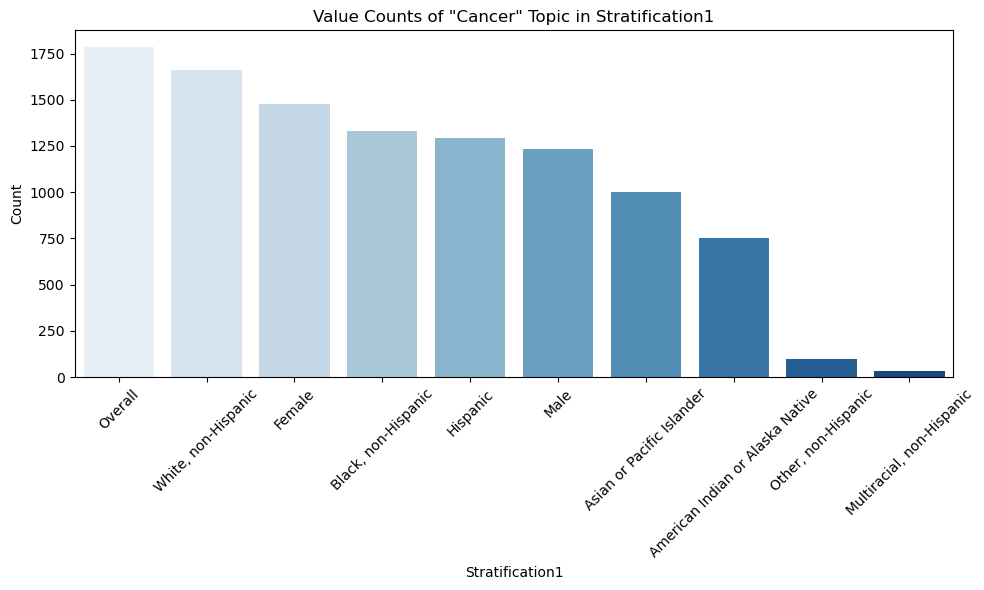

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame 'df_sample'
# Example:
# df_sample = pd.read_csv('your_dataset.csv')

# Get the value counts of 'Cancer' topic in the 'Stratification1' column
demographic_value_counts_with_cancer = df_sample[df_sample['Yes_cancer'] == 1]['Stratification1'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x=demographic_value_counts_with_cancer.index, y=demographic_value_counts_with_cancer.values, palette='Blues')

# Set labels and title
plt.xlabel('Stratification1')
plt.ylabel('Count')
plt.title('Value Counts of "Cancer" Topic in Stratification1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  
plt.show()


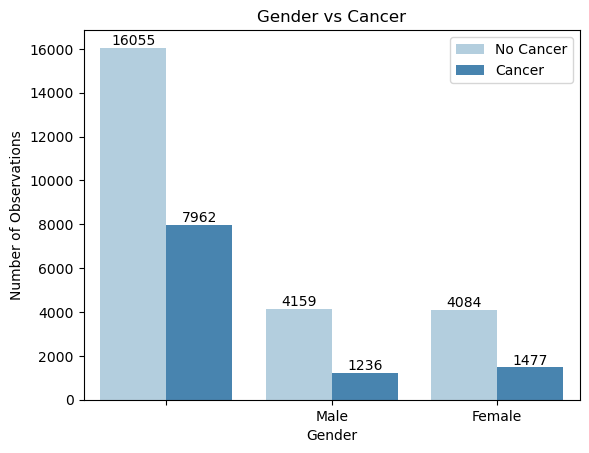

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df_sample' with the required data
new_labels = {'no cancer': 'No Cancer', 'cancer': 'Cancer'}

# Visualizing the Gender vs Cancer
cg = sns.countplot(data=df_sample, x='Gender', hue='Yes_cancer', palette='Blues')

# Access the legend object
legend = cg.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['no cancer'])
legend.get_texts()[1].set_text(new_labels['cancer'])

# # Relabel the x-axis ticks
# plt.xticks(range(len(x)), x)

cg.set_xlabel('Gender')
cg.set_ylabel('Number of Observations')
plt.title('Gender vs Cancer')



# Add count numbers on bars
for p in cg.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    cg.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


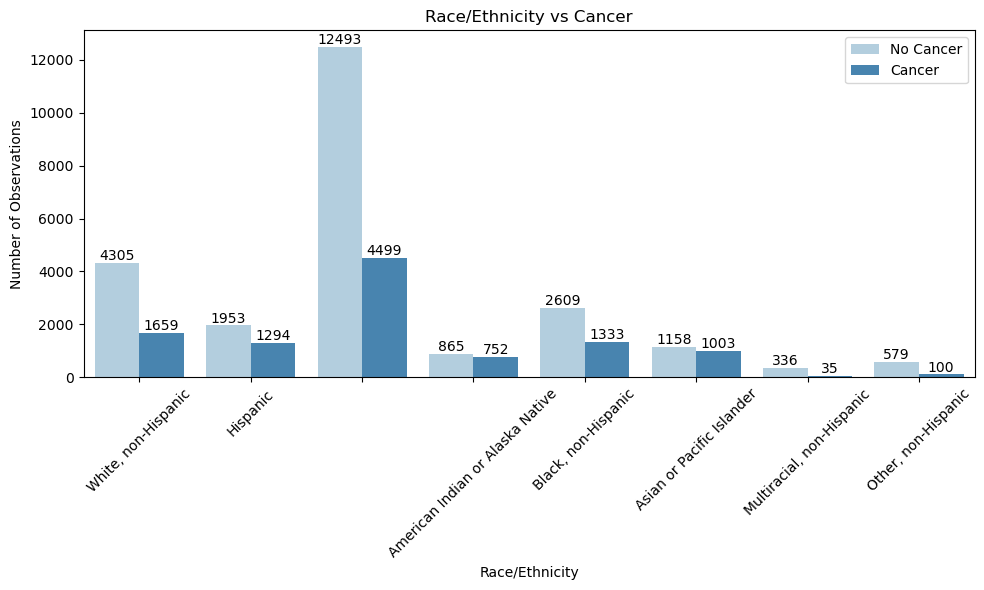

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df_sample' with the required data
new_labels = {'no cancer': 'No Cancer', 'cancer': 'Cancer'}

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Visualizing the Race/Ethnicity vs Cancer
eg = sns.countplot(data=df_sample, x='Race/Ethnicity', hue='Yes_cancer', palette='Blues')

# Access the legend object
legend = eg.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['no cancer'])
legend.get_texts()[1].set_text(new_labels['cancer'])

eg.set_xlabel('Race/Ethnicity')
eg.set_ylabel('Number of Observations')
plt.title('Race/Ethnicity vs Cancer')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add count numbers on bars
for p in eg.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    eg.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Use tight layout
plt.tight_layout()

plt.show()
